## CMPINF 2110 Spring 2021 - Week 08

Review Pandas and SQL related operations for manipulating, accessing, and building relational models.

## Import Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read in the Batting Table

The data we will work with is a small subset of the complete Lahman package data set.

https://cran.r-project.org/web/packages/Lahman/index.html

In [5]:
batting = pd.read_csv( 'lahman_batting_table_nlcentral.csv' )

In [6]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerID  295 non-null    object
 1   yearID    295 non-null    int64 
 2   lgID      295 non-null    object
 3   teamID    295 non-null    object
 4   stint     295 non-null    int64 
 5   G         295 non-null    int64 
 6   AB        295 non-null    int64 
 7   H         295 non-null    int64 
 8   HR        295 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 20.9+ KB


In [7]:
batting.isna().sum()

playerID    0
yearID      0
lgID        0
teamID      0
stint       0
G           0
AB          0
H           0
HR          0
dtype: int64

In [8]:
batting.dtypes

playerID    object
yearID       int64
lgID        object
teamID      object
stint        int64
G            int64
AB           int64
H            int64
HR           int64
dtype: object

In [9]:
batting.head()

,playerID,yearID,lgID,teamID,stint,G,AB,H,HR
0,adducji02,2019,NL,CHN,1,2,5,0,0
1,agrazda01,2019,NL,PIT,1,15,22,2,0
2,aguilje01,2019,NL,MIL,1,94,222,50,8
3,aguilje01,2019,AL,TBA,2,37,92,24,4
4,alanirj01,2019,AL,SEA,1,4,0,0,0


In [11]:
batting.tail()

,playerID,yearID,lgID,teamID,stint,G,AB,H,HR
290,woodal02,2019,NL,CIN,1,7,9,2,0
291,woodrbr01,2019,NL,MIL,1,27,45,12,0
292,yelicch01,2019,NL,MIL,1,130,489,161,44
293,zagunma01,2019,NL,CHN,1,30,36,9,0
294,zobribe01,2019,NL,CHN,1,47,150,39,1


The number of unique values for each column in the data set.

In [12]:
batting.nunique()

playerID    245
yearID        1
lgID          2
teamID       24
stint         3
G           108
AB          137
H            75
HR           34
dtype: int64

In [13]:
batting.shape

(295, 9)

What are the unique values for `playerID` and how many rows are associated with each value?

In [14]:
batting.playerID.value_counts()

josepco01    3
austity01    3
maldoma01    3
mejiaad01    3
chacijh01    2
            ..
underdu01    1
iglesra01    1
adducji02    1
winkeje01    1
jacksja01    1
Name: playerID, Length: 245, dtype: int64

In [15]:
batting.playerID.value_counts().value_counts()

1    199
2     42
3      4
Name: playerID, dtype: int64

In [16]:
batting.groupby(['playerID']).size().reset_index(name='num_rows')

,playerID,num_rows
0,adducji02,1
1,agrazda01,1
2,aguilje01,2
3,alanirj01,2
4,alberma01,1
...,...,...
240,woodal02,1
241,woodrbr01,1
242,yelicch01,1
243,zagunma01,1


In [17]:
batting.groupby(['playerID']).size().reset_index(name='num_rows').sort_values(['num_rows'], ascending=False)

,playerID,num_rows
121,josepco01,3
142,maldoma01,3
12,austity01,3
152,mejiaad01,3
68,fariaja01,2
...,...,...
96,haderjo01,1
97,hamelco01,1
98,happia01,1
100,hartlge01,1


In [18]:
batting.teamID.value_counts()

PIT    54
CHN    52
MIL    50
CIN    47
SLN    43
SFN    10
KCA     4
LAA     3
CLE     3
OAK     3
SEA     3
TOR     3
PHI     3
NYN     2
MIN     2
TBA     2
HOU     2
ATL     2
SDN     2
BAL     1
BOS     1
DET     1
NYA     1
LAN     1
Name: teamID, dtype: int64

In [19]:
batting.lgID.value_counts()

NL    266
AL     29
Name: lgID, dtype: int64

In [20]:
batting.yearID.value_counts()

2019    295
Name: yearID, dtype: int64

Identify what represents a single row in the DataFrame.

In [21]:
batting.groupby(['playerID', 'teamID', 'lgID', 'yearID']).\
size().\
reset_index(name='num_rows')

,playerID,teamID,lgID,yearID,num_rows
0,adducji02,CHN,NL,2019,1
1,agrazda01,PIT,NL,2019,1
2,aguilje01,MIL,NL,2019,1
3,aguilje01,TBA,AL,2019,1
4,alanirj01,CIN,NL,2019,1
...,...,...,...,...,...
290,woodal02,CIN,NL,2019,1
291,woodrbr01,MIL,NL,2019,1
292,yelicch01,MIL,NL,2019,1
293,zagunma01,CHN,NL,2019,1


In [24]:
batting.groupby(['playerID', 'teamID', 'lgID', 'yearID']).\
size().\
reset_index(name='num_rows').\
num_rows.\
value_counts()

1    295
Name: num_rows, dtype: int64

What's going on with the `stint` variable in the data set?

Review grouping and aggregating in Pandas.

In [25]:
batting.groupby(['playerID', 'yearID']).\
aggregate(num_rows = ('H', 'size'),
          num_nonmissings = ('H', 'count'), 
          num_teams = ('teamID', 'nunique'),
          num_stints = ('stint', 'nunique'),
          the_teams = ('teamID', 'unique'),
          the_stints = ('stint', 'unique')).\
reset_index()

,playerID,yearID,num_rows,num_nonmissings,num_teams,num_stints,the_teams,the_stints
0,adducji02,2019,1,1,1,1,[CHN],[1]
1,agrazda01,2019,1,1,1,1,[PIT],[1]
2,aguilje01,2019,2,2,2,2,"[MIL, TBA]","[1, 2]"
3,alanirj01,2019,2,2,2,2,"[SEA, CIN]","[1, 2]"
4,alberma01,2019,1,1,1,1,[MIL],[1]
...,...,...,...,...,...,...,...,...
240,woodal02,2019,1,1,1,1,[CIN],[1]
241,woodrbr01,2019,1,1,1,1,[MIL],[1]
242,yelicch01,2019,1,1,1,1,[MIL],[1]
243,zagunma01,2019,1,1,1,1,[CHN],[1]


In [28]:
batting.groupby(['playerID', 'yearID']).\
aggregate(num_rows = ('H', 'size'),
          num_nonmissings = ('H', 'count'), 
          num_teams = ('teamID', 'nunique'),
          num_stints = ('stint', 'nunique'),
          the_teams = ('teamID', 'unique'),
          the_stints = ('stint', 'unique')).\
reset_index().\
groupby(['num_teams', 'num_stints']).\
size().\
reset_index(name='num_players')

,num_teams,num_stints,num_players
0,1,1,199
1,2,2,42
2,3,3,4


In [31]:
player_summary_in_year = batting.groupby(['playerID', 'yearID']).\
aggregate(num_rows = ('H', 'size'),
          num_nonmissing = ('H', 'count'),
          num_teams = ('teamID', 'nunique'),
          num_stints = ('stint', 'nunique'),
          num_league = ('lgID', 'nunique'),
          num_games = ('G', 'sum'),
          num_hits = ('H', 'sum'),
          num_atbats = ('AB', 'sum'),
          num_homeruns = ('HR', 'sum')).\
reset_index()

In [32]:
player_summary_in_year

,playerID,yearID,num_rows,num_nonmissing,num_teams,num_stints,num_league,num_games,num_hits,num_atbats,num_homeruns
0,adducji02,2019,1,1,1,1,1,2,0,5,0
1,agrazda01,2019,1,1,1,1,1,15,2,22,0
2,aguilje01,2019,2,2,2,2,2,131,74,314,12
3,alanirj01,2019,2,2,2,2,2,12,1,1,0
4,alberma01,2019,1,1,1,1,1,67,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
240,woodal02,2019,1,1,1,1,1,7,2,9,0
241,woodrbr01,2019,1,1,1,1,1,27,12,45,0
242,yelicch01,2019,1,1,1,1,1,130,161,489,44
243,zagunma01,2019,1,1,1,1,1,30,9,36,0


## Read in the player information table

In [33]:
player_info = pd.read_csv( 'lahman_people_table_nlcentral.csv' )

In [34]:
player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   playerID   245 non-null    object
 1   nameLast   245 non-null    object
 2   nameFirst  245 non-null    object
 3   nameGiven  245 non-null    object
 4   birthDate  245 non-null    object
 5   debut      245 non-null    object
 6   finalGame  245 non-null    object
 7   bats       245 non-null    object
 8   throws     245 non-null    object
dtypes: object(9)
memory usage: 17.4+ KB


In [35]:
player_info

,playerID,nameLast,nameFirst,nameGiven,birthDate,debut,finalGame,bats,throws
0,adducji02,Adduci,Jim,Jim Charles,1985-05-15,2013-09-01,2019-06-01,L,L
1,agrazda01,Agrazal,Dario,Dario Abdiel,1994-12-28,2019-06-15,2019-09-25,R,R
2,aguilje01,Aguilar,Jesus,Jesus Alexander,1990-06-30,2014-05-15,2019-09-29,R,R
3,alanirj01,Alaniz,R. J.,Ruben,1991-06-14,2019-04-12,2019-09-28,R,R
4,alberma01,Albers,Matt,Matthew James,1983-01-20,2006-07-25,2019-09-28,L,R
...,...,...,...,...,...,...,...,...,...
240,woodal02,Wood,Alex,Robert Alexander,1991-01-12,2013-05-30,2019-08-29,R,L
241,woodrbr01,Woodruff,Brandon,Brandon Kyle,1993-02-10,2017-08-04,2019-09-22,L,R
242,yelicch01,Yelich,Christian,Christian Stephen,1991-12-05,2013-07-23,2019-09-10,L,R
243,zagunma01,Zagunis,Mark,Mark Raymond,1993-02-05,2017-06-22,2019-08-18,R,R


In [36]:
player_info.bats.value_counts()

R    163
L     66
B     16
Name: bats, dtype: int64

In [37]:
player_info.throws.value_counts()

R    202
L     43
Name: throws, dtype: int64

JOIN the two tables together using the `pd.merge()` function.

In [38]:
batting_summary_in_year = pd.merge( player_summary_in_year, player_info, on=['playerID'], how='left')

In [39]:
batting_summary_in_year

,playerID,yearID,num_rows,num_nonmissing,num_teams,num_stints,num_league,num_games,num_hits,num_atbats,num_homeruns,nameLast,nameFirst,nameGiven,birthDate,debut,finalGame,bats,throws
0,adducji02,2019,1,1,1,1,1,2,0,5,0,Adduci,Jim,Jim Charles,1985-05-15,2013-09-01,2019-06-01,L,L
1,agrazda01,2019,1,1,1,1,1,15,2,22,0,Agrazal,Dario,Dario Abdiel,1994-12-28,2019-06-15,2019-09-25,R,R
2,aguilje01,2019,2,2,2,2,2,131,74,314,12,Aguilar,Jesus,Jesus Alexander,1990-06-30,2014-05-15,2019-09-29,R,R
3,alanirj01,2019,2,2,2,2,2,12,1,1,0,Alaniz,R. J.,Ruben,1991-06-14,2019-04-12,2019-09-28,R,R
4,alberma01,2019,1,1,1,1,1,67,0,0,0,Albers,Matt,Matthew James,1983-01-20,2006-07-25,2019-09-28,L,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,woodal02,2019,1,1,1,1,1,7,2,9,0,Wood,Alex,Robert Alexander,1991-01-12,2013-05-30,2019-08-29,R,L
241,woodrbr01,2019,1,1,1,1,1,27,12,45,0,Woodruff,Brandon,Brandon Kyle,1993-02-10,2017-08-04,2019-09-22,L,R
242,yelicch01,2019,1,1,1,1,1,130,161,489,44,Yelich,Christian,Christian Stephen,1991-12-05,2013-07-23,2019-09-10,L,R
243,zagunma01,2019,1,1,1,1,1,30,9,36,0,Zagunis,Mark,Mark Raymond,1993-02-05,2017-06-22,2019-08-18,R,R


How can we calculate the age of a player?

In [40]:
batting_summary_in_year.dtypes

playerID          object
yearID             int64
num_rows           int64
num_nonmissing     int64
num_teams          int64
num_stints         int64
num_league         int64
num_games          int64
num_hits           int64
num_atbats         int64
num_homeruns       int64
nameLast          object
nameFirst         object
nameGiven         object
birthDate         object
debut             object
finalGame         object
bats              object
throws            object
dtype: object

First convert the dates from strings to datetime objects.

In [41]:
batting_summary_in_year['birth_date_dt'] = pd.to_datetime( batting_summary_in_year.birthDate )

In [42]:
batting_summary_in_year['birth_year'] = batting_summary_in_year.birth_date_dt.dt.year

In [43]:
batting_summary_in_year

,playerID,yearID,num_rows,num_nonmissing,num_teams,num_stints,num_league,num_games,num_hits,num_atbats,...,nameLast,nameFirst,nameGiven,birthDate,debut,finalGame,bats,throws,birth_date_dt,birth_year
0,adducji02,2019,1,1,1,1,1,2,0,5,...,Adduci,Jim,Jim Charles,1985-05-15,2013-09-01,2019-06-01,L,L,1985-05-15,1985
1,agrazda01,2019,1,1,1,1,1,15,2,22,...,Agrazal,Dario,Dario Abdiel,1994-12-28,2019-06-15,2019-09-25,R,R,1994-12-28,1994
2,aguilje01,2019,2,2,2,2,2,131,74,314,...,Aguilar,Jesus,Jesus Alexander,1990-06-30,2014-05-15,2019-09-29,R,R,1990-06-30,1990
3,alanirj01,2019,2,2,2,2,2,12,1,1,...,Alaniz,R. J.,Ruben,1991-06-14,2019-04-12,2019-09-28,R,R,1991-06-14,1991
4,alberma01,2019,1,1,1,1,1,67,0,0,...,Albers,Matt,Matthew James,1983-01-20,2006-07-25,2019-09-28,L,R,1983-01-20,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,woodal02,2019,1,1,1,1,1,7,2,9,...,Wood,Alex,Robert Alexander,1991-01-12,2013-05-30,2019-08-29,R,L,1991-01-12,1991
241,woodrbr01,2019,1,1,1,1,1,27,12,45,...,Woodruff,Brandon,Brandon Kyle,1993-02-10,2017-08-04,2019-09-22,L,R,1993-02-10,1993
242,yelicch01,2019,1,1,1,1,1,130,161,489,...,Yelich,Christian,Christian Stephen,1991-12-05,2013-07-23,2019-09-10,L,R,1991-12-05,1991
243,zagunma01,2019,1,1,1,1,1,30,9,36,...,Zagunis,Mark,Mark Raymond,1993-02-05,2017-06-22,2019-08-18,R,R,1993-02-05,1993


Calculate the age of each player in the year 2019.

In [44]:
batting_summary_in_year['player_age'] = batting_summary_in_year.yearID - batting_summary_in_year.birth_year

In [45]:
batting_summary_in_year

,playerID,yearID,num_rows,num_nonmissing,num_teams,num_stints,num_league,num_games,num_hits,num_atbats,...,nameFirst,nameGiven,birthDate,debut,finalGame,bats,throws,birth_date_dt,birth_year,player_age
0,adducji02,2019,1,1,1,1,1,2,0,5,...,Jim,Jim Charles,1985-05-15,2013-09-01,2019-06-01,L,L,1985-05-15,1985,34
1,agrazda01,2019,1,1,1,1,1,15,2,22,...,Dario,Dario Abdiel,1994-12-28,2019-06-15,2019-09-25,R,R,1994-12-28,1994,25
2,aguilje01,2019,2,2,2,2,2,131,74,314,...,Jesus,Jesus Alexander,1990-06-30,2014-05-15,2019-09-29,R,R,1990-06-30,1990,29
3,alanirj01,2019,2,2,2,2,2,12,1,1,...,R. J.,Ruben,1991-06-14,2019-04-12,2019-09-28,R,R,1991-06-14,1991,28
4,alberma01,2019,1,1,1,1,1,67,0,0,...,Matt,Matthew James,1983-01-20,2006-07-25,2019-09-28,L,R,1983-01-20,1983,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,woodal02,2019,1,1,1,1,1,7,2,9,...,Alex,Robert Alexander,1991-01-12,2013-05-30,2019-08-29,R,L,1991-01-12,1991,28
241,woodrbr01,2019,1,1,1,1,1,27,12,45,...,Brandon,Brandon Kyle,1993-02-10,2017-08-04,2019-09-22,L,R,1993-02-10,1993,26
242,yelicch01,2019,1,1,1,1,1,130,161,489,...,Christian,Christian Stephen,1991-12-05,2013-07-23,2019-09-10,L,R,1991-12-05,1991,28
243,zagunma01,2019,1,1,1,1,1,30,9,36,...,Mark,Mark Raymond,1993-02-05,2017-06-22,2019-08-18,R,R,1993-02-05,1993,26


What's the relationship between the number of homeruns hit in a season and the age of a player?

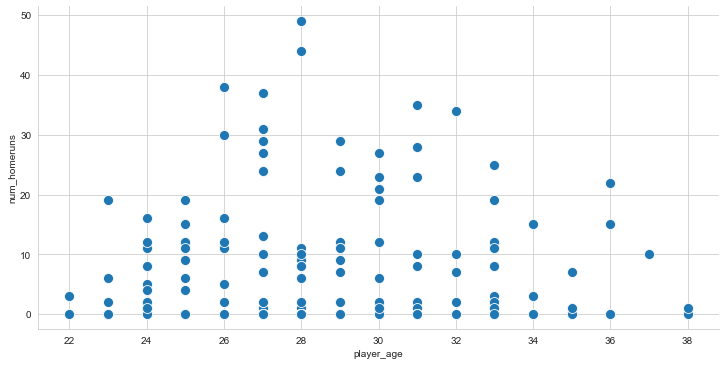

In [46]:
sns.set_style('whitegrid')

sns.relplot(data = batting_summary_in_year, x='player_age', y='num_homeruns', s=100, aspect=2)

plt.show()

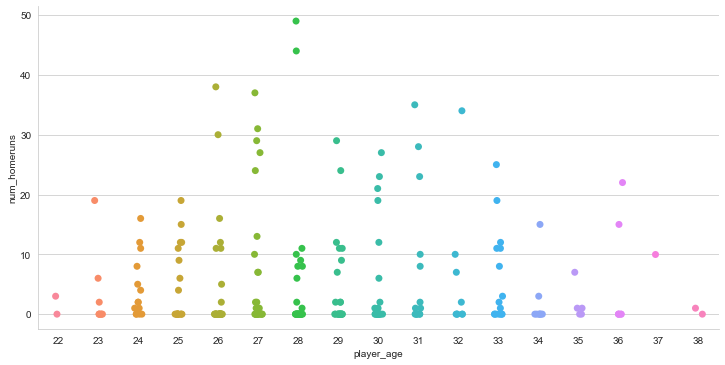

In [47]:
sns.catplot(data = batting_summary_in_year, x='player_age', y='num_homeruns', kind='strip', s=7, aspect=2)

plt.show()

Find a player on the Pittsburgh Pirates. I can't use the summarized table to do that!

In [48]:
batting

,playerID,yearID,lgID,teamID,stint,G,AB,H,HR
0,adducji02,2019,NL,CHN,1,2,5,0,0
1,agrazda01,2019,NL,PIT,1,15,22,2,0
2,aguilje01,2019,NL,MIL,1,94,222,50,8
3,aguilje01,2019,AL,TBA,2,37,92,24,4
4,alanirj01,2019,AL,SEA,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...
290,woodal02,2019,NL,CIN,1,7,9,2,0
291,woodrbr01,2019,NL,MIL,1,27,45,12,0
292,yelicch01,2019,NL,MIL,1,130,489,161,44
293,zagunma01,2019,NL,CHN,1,30,36,9,0


In [49]:
batting.loc[ batting.teamID.isin(['PIT']), :]

,playerID,yearID,lgID,teamID,stint,G,AB,H,HR
1,agrazda01,2019,NL,PIT,1,15,22,2,0
11,archech01,2019,NL,PIT,1,23,35,4,0
23,baronst01,2019,NL,PIT,1,7,10,2,0
26,belljo02,2019,NL,PIT,1,143,527,146,37
34,braulst01,2019,NL,PIT,1,34,42,14,1
38,burdini01,2019,NL,PIT,1,11,0,0,0
41,cabreme01,2019,NL,PIT,1,133,378,106,7
50,cervefr01,2019,NL,PIT,1,34,109,21,1
60,crickky01,2019,NL,PIT,1,52,0,0,0
63,davisro03,2019,NL,PIT,1,5,1,0,0


## Read in the team information

In [51]:
team_info = pd.read_csv( 'lahman_team_table.csv' )

In [52]:
team_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   lgID       30 non-null     object
 1   teamID     30 non-null     object
 2   team_name  30 non-null     object
dtypes: object(3)
memory usage: 848.0+ bytes


In [53]:
team_info

,lgID,teamID,team_name
0,NL,ARI,Arizona Diamondbacks
1,NL,ATL,Atlanta Braves
2,AL,BAL,Baltimore Orioles
3,AL,BOS,Boston Red Sox
4,AL,CHA,Chicago White Sox
5,NL,CHN,Chicago Cubs
6,NL,CIN,Cincinnati Reds
7,AL,CLE,Cleveland Indians
8,NL,COL,Colorado Rockies
9,AL,DET,Detroit Tigers


Count the number of times a particular character occurs in a string. Specifically, we might be interested in splitting by a whitespace, `' '`, so how many whitespaces are there in the `team_name`?

In [54]:
team_info.team_name.str.count(' ')

0     1
1     1
2     1
3     2
4     2
5     1
6     1
7     1
8     1
9     1
10    1
11    2
12    4
13    2
14    1
15    1
16    1
17    2
18    2
19    1
20    1
21    1
22    2
23    1
24    2
25    2
26    2
27    1
28    2
29    1
Name: team_name, dtype: int64

In [55]:
team_info.team_name.str.count(' ').value_counts()

1    18
2    11
4     1
Name: team_name, dtype: int64